This document is about taking a series of currency prices and calculating past bounces at support or resistance levels that are given as input to the system. For this task I will use Python code. 

Let's start by getting the price data that we will use in our calculations. In this case I will use the Oanda API to get the historical data and some libraries I've written.

In [41]:
from OandaAPI import OandaAPI
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('seaborn-whitegrid')

%matplotlib inline

In [42]:
oanda=OandaAPI(url='https://api-fxtrade.oanda.com/v1/candles?',
               instrument='AUD_USD',
               granularity='D',
               alignmentTimezone='Europe/London',
               start='2015-03-12T22:00:00',
               end='2019-03-12T22:00:00')

With the call above we are getting candle information covering 4 years of data

And if we get the closeAsk prices and the datetime for each of the fetched candles:

In [43]:
    close_prices=[]
    datetimes=[]
    for c in oanda.fetch_candleset():
        close_prices.append(c.closeAsk)
        datetimes.append(c.time)

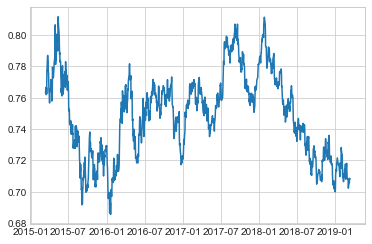

In [44]:
fig = plt.figure()
ax = plt.axes()

ax.plot(datetimes, close_prices)

# Using peakutils

In [171]:
import peakutils

Detecting peaks:

In [177]:
cb = np.array(close_prices)
indices = peakutils.indexes(cb, thres=0.50, min_dist=0.1)

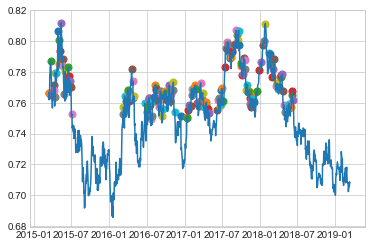

In [178]:
fig = plt.figure()
ax = plt.axes()

ax.plot(datetimes, close_prices)
for ix in indices:
    plt.scatter(datetimes[ix],close_prices[ix], s=50)

Detecting valleys:

In [180]:
indices = peakutils.indexes(-cb, thres=0.50, min_dist=0.1)

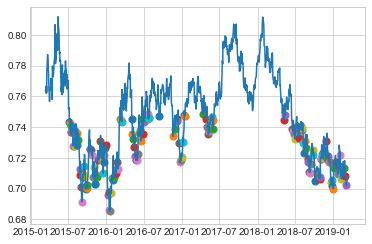

In [181]:
fig = plt.figure()
ax = plt.axes()

ax.plot(datetimes, close_prices)
for ix in indices:
    plt.scatter(datetimes[ix],close_prices[ix], s=50)

# Using scipy.signal

Let's create some example data and use the polynomial fit to smooth the noisy data

In [103]:
# example data with peaks:
x = np.linspace(-1,3,1000)
data = -0.1*np.cos(12*x)+ np.exp(-(1-x)**2)

Plotting the data

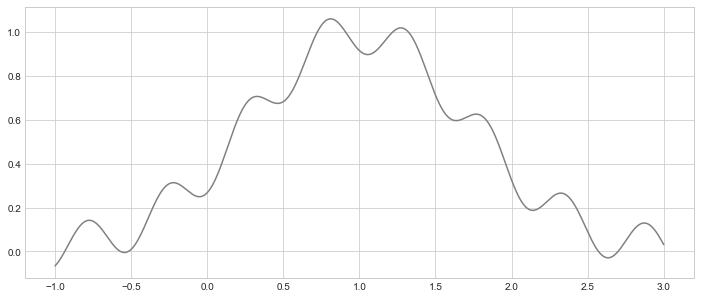

In [104]:
# plot
plt.figure(figsize=(12, 5))
plt.plot(x, data, color='grey')

In [105]:
from scipy.signal import argrelextrema

# for local maxima
max=argrelextrema(data, np.greater)

# for local minima
min=argrelextrema(data, np.less)

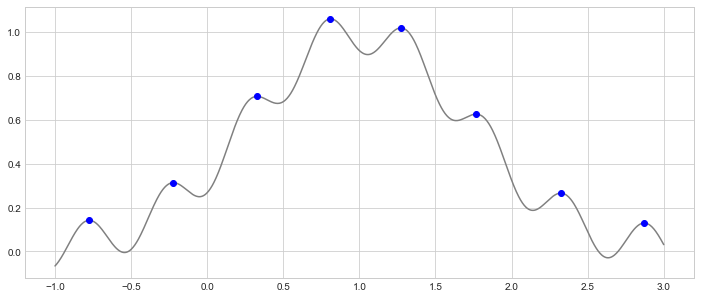

In [110]:
# maxima
# plot
plt.figure(figsize=(12, 5))
plt.plot(x, data, color='grey')
plt.plot(x[max], data[max], "o", label="max", color='b')

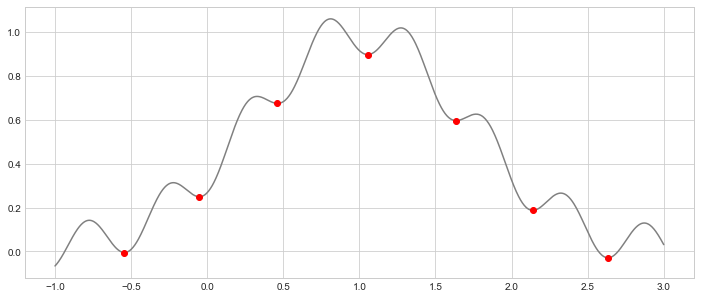

In [109]:
# minima
# plot
plt.figure(figsize=(12, 5))
plt.plot(x, data, color='grey')
plt.plot(x[min], data[min], "o", label="min", color='r')

## Now let's use the candle data retrieved before 

Let's smooth the data

In [159]:
data = -0.1*np.cos(12*np.array(close_prices))+ np.exp(-(1-np.array(close_prices)**2))

And let's plot the data to draw the support and resistance lines

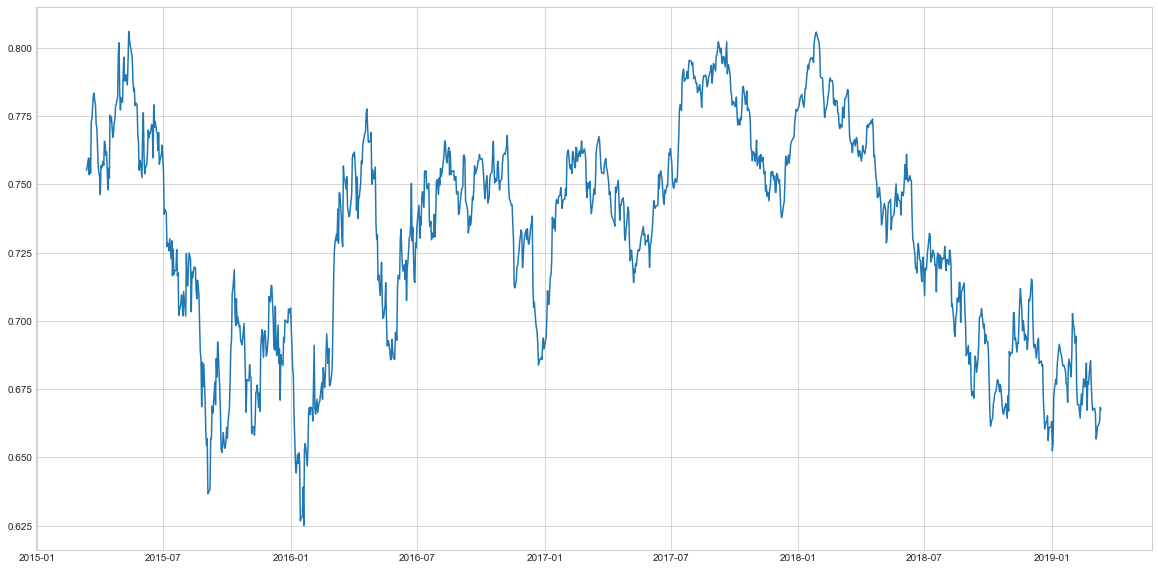

In [163]:
fig = plt.figure(figsize=(20,10))
ax = plt.axes()

ax.plot(datetimes, data)

plt.show()

In this document we are going to use the resistance line at around 0.81 to illustrate how to detect bounces at this level

In [146]:
# for local maxima
max=argrelextrema(data, np.greater)

In [147]:
# for local minima
min=argrelextrema(data, np.less)

Let's plot the identified local maxima and minima

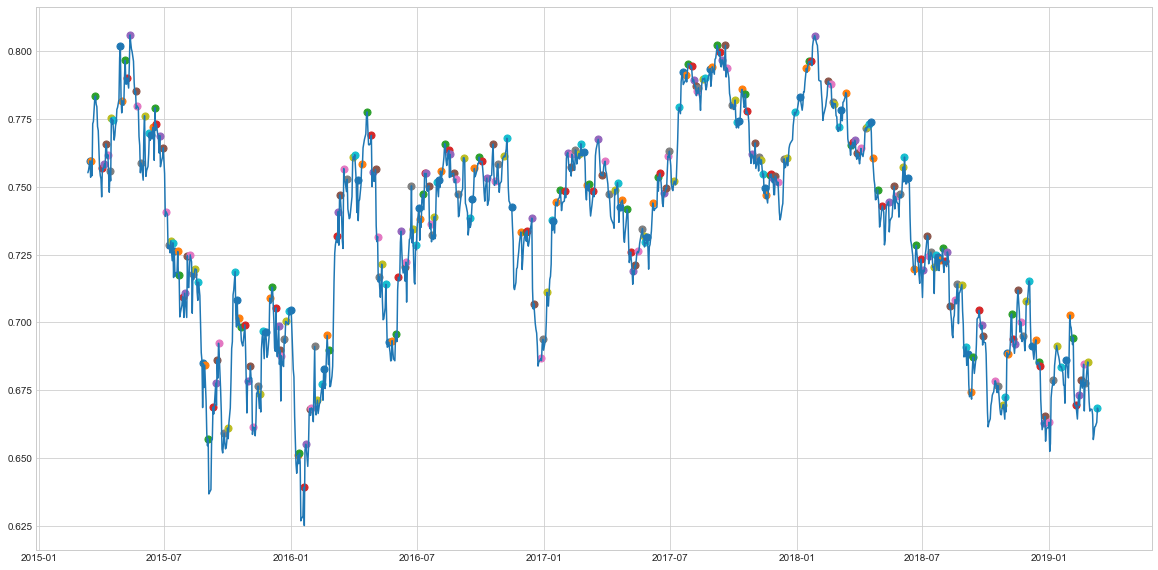

In [149]:
# maxima
# plot
fig = plt.figure(figsize=(20,10))
ax = plt.axes()

ax.plot(datetimes, data)
for ix in max[0]:
    plt.scatter(datetimes[ix],data[ix], s=50)

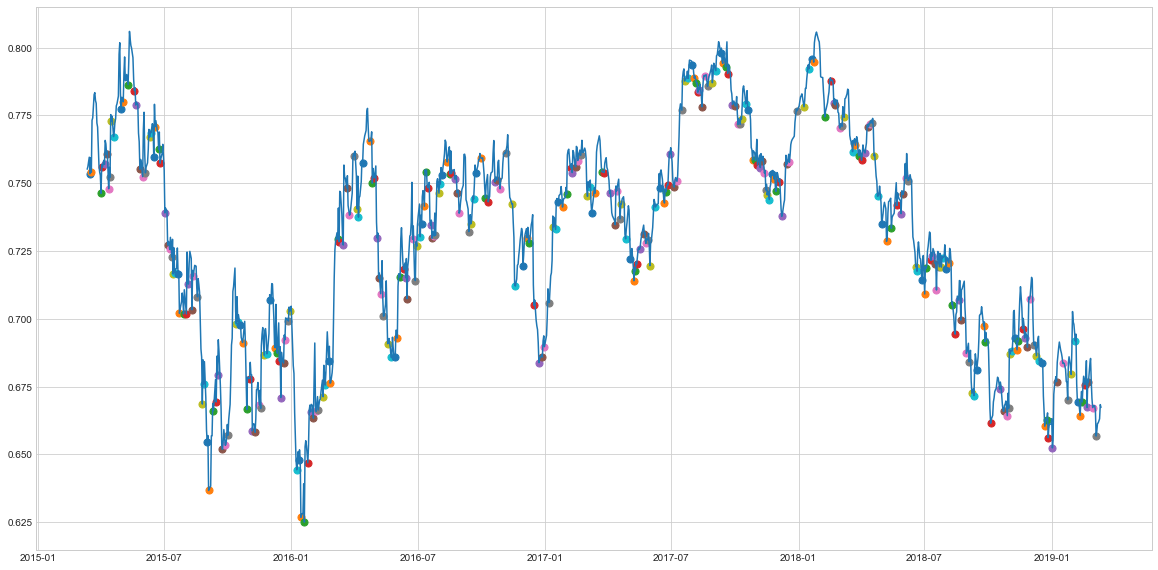

In [155]:
# minima
# plot
fig = plt.figure(figsize=(20,10))
ax = plt.axes()

ax.plot(datetimes, data)
for ix in min[0]:
    plt.scatter(datetimes[ix],data[ix], s=50)

And now, let's select the maxima bouncing on the 0.81 resistance line

0.8018442846457496 2015-04-28 16:00:00
0.8060253198098106 2015-05-12 16:00:00
0.8022277634545061 2017-09-07 16:00:00
0.8021778726284683 2017-09-19 16:00:00
0.8057825320398453 2018-01-26 17:00:00


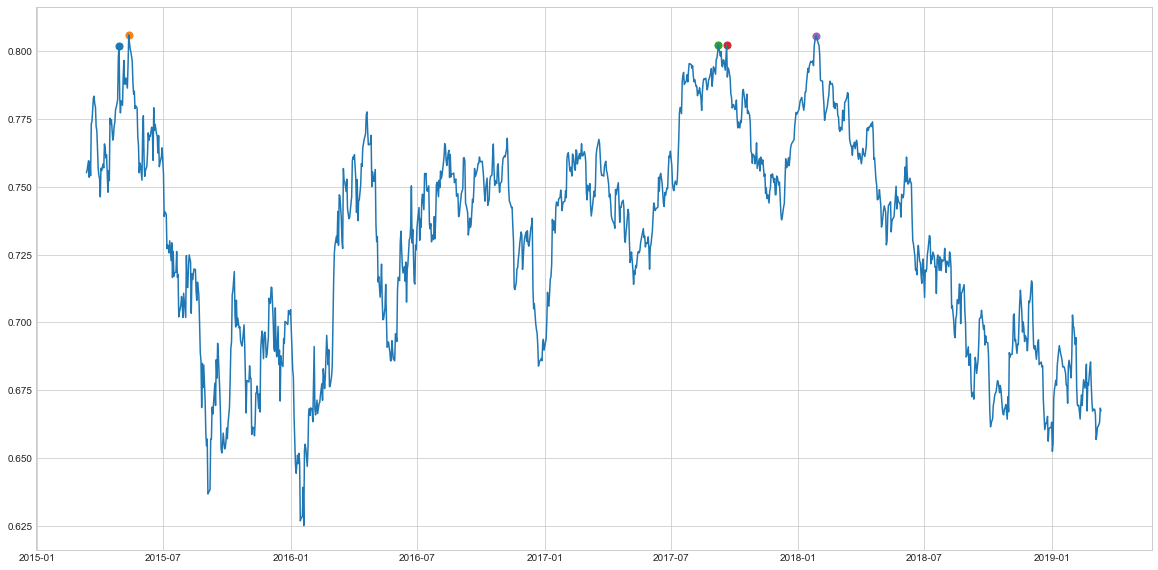

In [170]:
fig = plt.figure(figsize=(20,10))
ax = plt.axes()

ax.plot(datetimes, data)
for i in max[0]:
    if data[i]>= 0.80:
        print(data[i],datetimes[i])
        plt.scatter(datetimes[i],data[i], s=50)